In [304]:
# general
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from IPython.display import display

%matplotlib inline

from pylab import rcParams
rcParams['figure.figsize'] = 8, 5

# first used in exercise one
import coorddescent as cd

from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LassoCV

# first used in exercise two
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

# first used in exercise three
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import Lasso
from sklearn.model_selection import cross_val_score

In [4]:
#import importlib
#importlib.reload(cd)

# Exercise One

In [5]:
h = pd.read_csv('Hitters.csv', index_col=0)
h.shape

(322, 20)

In [6]:
h[:3]

,AtBat,Hits,HmRun,Runs,RBI,Walks,Years,CAtBat,CHits,CHmRun,CRuns,CRBI,CWalks,League,Division,PutOuts,Assists,Errors,Salary,NewLeague
Name,,,,,,,,,,,,,,,,,,,,
-Andy Allanson,293,66,1,30,29,14,1,293,66,1,30,29,14,A,E,446,33,20,NaN,A
-Alan Ashby,315,81,7,24,38,39,14,3449,835,69,321,414,375,N,W,632,43,10,475.0,N
-Alvin Davis,479,130,18,66,72,76,3,1624,457,63,224,266,263,A,W,880,82,14,480.0,A


In [7]:
# remove rows w/ empty values - i think this is only those w/ no salary
h = h.dropna()
h.shape

(263, 20)

In [8]:
# convert categorical vars to dummy variables
h = pd.get_dummies(h)
h.shape

(263, 23)

In [102]:
h[:1]

,AtBat,Hits,HmRun,Runs,RBI,Walks,Years,CAtBat,CHits,CHmRun,...,PutOuts,Assists,Errors,Salary,League_A,League_N,Division_E,Division_W,NewLeague_A,NewLeague_N
Name,,,,,,,,,,,,,,,,,,,,,
-Alan Ashby,315,81,7,24,38,39,14,3449,835,69,...,632,43,10,475.0,0,1,0,1,0,1


While the homework doesn't state it specifically, I assume here that we're predicting salary, since that's what we've done previously.

In [125]:
# split into features and the value to predict (x and y)
# scale all features so each col has mean zero and std 1
X_scaled = preprocessing.scale(h.drop('Salary', axis=1))
y = preprocessing.scale(h['Salary'], with_mean=True, with_std=False) # TODO Geoff said just to center - correct?

(X_scaled.shape, y.shape)

((263, 22), (263,))

In [126]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, random_state=0, test_size=0.25)

In [127]:
(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

((197, 22), (66, 22), (197,), (66,))

In [128]:
lambda_vals = [10**k for k in range(-5, 5)]
# increasing max_iter from default of 1000 to ensure convergence (per
# a warning that I'll get when it's the default), also setting 
# normalize to False as we've already standardized the data
lasso = LassoCV(alphas=lambda_vals, normalize=False, fit_intercept=False, max_iter=3000)

lasso.fit(X_train, y_train)
print('Estimated lambda =', lasso.alpha_)
print('Estimated coefficients =', lasso.coef_)
print('Estimated intercept =', lasso.intercept_)

Estimated lambda = 10.0
Estimated coefficients = [ -0.00000000e+00   8.58601238e+01   2.31341180e+01   0.00000000e+00
   0.00000000e+00   5.30007543e+01  -0.00000000e+00   0.00000000e+00
   1.81021741e+02   0.00000000e+00   7.94408792e+00   0.00000000e+00
  -0.00000000e+00   4.29183221e+01  -0.00000000e+00  -1.69208651e+01
  -2.65772925e+00   0.00000000e+00   4.56974438e+01  -1.50312135e-14
  -0.00000000e+00   0.00000000e+00]
Estimated intercept = 0.0


In [129]:
betas_cyclic = cd.cycliccoorddescent(X_train, y_train, lasso.alpha_, max_iter=1000)
cd.get_final_coefs(betas_cyclic)

array([ -3.01286738e+02,   2.99128868e+02,   6.52703798e+01,
        -4.08042709e+01,   2.46861773e+00,   1.53332103e+02,
        -8.64033965e+01,   1.71077484e+02,   2.70097078e+02,
         5.35526842e+01,   9.28557194e+01,  -1.29517289e+02,
        -2.03225658e+02,   6.03806106e+01,   3.54852288e+01,
        -3.70178409e+01,  -1.77482519e+01,   2.27993363e-12,
         5.69311903e+01,  -2.34949429e-12,   9.53202545e+00,
         0.00000000e+00])

In [130]:
betas_random = cd.randcoorddescent(X_train, y_train, lasso.alpha_, max_iter=1000)
cd.get_final_coefs(betas_random)

array([ -1.68455512e+02,   1.68533254e+02,   6.33393034e+01,
        -1.82744723e+01,   6.09461122e-01,   1.23022541e+02,
        -6.33800988e+01,  -7.43572206e+01,   2.22920670e+02,
        -9.61693905e+01,   1.99874770e+02,   1.47695646e+02,
        -1.71531569e+02,   5.77674893e+01,   3.73656201e+01,
        -4.18656431e+01,  -2.18332544e+01,  -6.02323017e-01,
        -3.53314491e-02,  -5.77883831e+01,   1.02792801e+01,
        -3.43774963e-01])

In [131]:
obj_values = pd.DataFrame({
    'cyclic': betas_cyclic.apply(lambda r: cd.lasso_objective(r.as_matrix(), X_train, y_train, lasso.alpha_), axis=1),
    'random': betas_random.apply(lambda r: cd.lasso_objective(r.as_matrix(), X_train, y_train, lasso.alpha_), axis=1)
})
obj_values[:3]

,cyclic,random
0,171049.579605,171049.579605
1,145555.195978,170814.738601
2,145146.306599,132250.701295


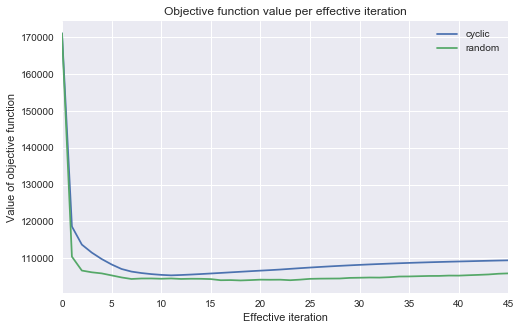

In [132]:
ax = obj_values[::X_train.shape[1]].reset_index(drop=True).plot(title="Objective function value per effective iteration")
ax.set_xlabel("Effective iteration")
ax.set_ylabel("Value of objective function")

In [133]:
X_scaled.shape

(263, 22)

In [135]:
cd.minimize_beta_term(np.zeros(X_scaled.shape[1]), X_scaled, y, 2, 0.1)

197.51759554509758

**TODO** do code (and of course text) for the last bullet.

# Exercise Two

"a) Generate a simulated data set with 20 observations in each of three classes (i.e. 60 observations total), and 50 variables. Hint: There are a number of functions in numpy that you can use to generate data. One example is the numpy.random.normal() func- tion; numpy.random.uniform() is another option. Be sure to add a mean shift to the observations in each class so that there are three distinct classes."

In [220]:
mean_vals = [0, 0.5, 1]
d = pd.DataFrame(np.vstack([np.random.normal(mean, size=(20,50)) for mean in mean_vals]))
d.insert(0, 'Class', np.repeat(['A','B','C'], 20))
d[:1]

,Class,0,1,2,3,4,5,6,7,8,...,40,41,42,43,44,45,46,47,48,49
0,A,1.238545,0.248186,0.070708,2.068699,-1.748564,-0.757585,-1.148017,1.395933,0.337178,...,-1.451193,-0.665275,-0.585129,0.194674,0.358302,-0.315859,-1.810976,-1.7268,-0.144119,-1.056794


"b) Perform PCA on the 60 observations and plot the first two principal component score vectors. Use a different color to indicate the observations in each of the three classes. If the three classes appear separated in this plot, then continue on to part (c). If not, then return to part (a) and modify the simulation so that there is greater separation between the three classes. Do not continue to part (c) until the three classes show at least some separation in the first two principal component score vectors."

**TODO** Make sure I figure out how to generate a PDF w/ color. Or, I can update the plot to use different symbols for each class?

In [221]:
d_train_values = d.values[:, 1:51].astype('float')

pca = PCA(2, svd_solver='randomized')
pca.fit(d_train_values)
values_PCA = pca.transform(d_train_values)

In [222]:
pca.components_.shape, values_PCA.shape

((2, 50), (60, 2))

In [223]:
pca.components_[0], pca.components_[1]

(array([ 0.10890424,  0.11233618,  0.13668824,  0.10781196,  0.19206595,
         0.11389879,  0.16387479,  0.16230814,  0.11195264,  0.13775363,
         0.21939331,  0.13449196,  0.17891366,  0.12819465,  0.19140607,
         0.08806998,  0.06671829,  0.17452005,  0.13373422,  0.1144399 ,
         0.11098955,  0.09890244,  0.06828223,  0.20640512,  0.14871112,
         0.10077548,  0.12655425,  0.07282374,  0.09159164,  0.02887412,
         0.18668021,  0.15427403,  0.21908177,  0.14418334,  0.10513524,
         0.07213987,  0.10110487,  0.1843278 ,  0.12517379,  0.15101731,
         0.1437282 ,  0.13702164,  0.14527707,  0.15641659,  0.1427031 ,
         0.15245191,  0.14717412,  0.13323111,  0.21865342,  0.10639155]),
 array([ 0.0859277 ,  0.15181005, -0.0954254 , -0.37239926,  0.01299975,
         0.03222108,  0.33709085, -0.13578011, -0.11040155, -0.13269174,
        -0.02928188,  0.06568807, -0.01784535,  0.11756229, -0.06732855,
        -0.24032805,  0.04420312,  0.26737032, -0

**TODO** I don't think i need this at all.

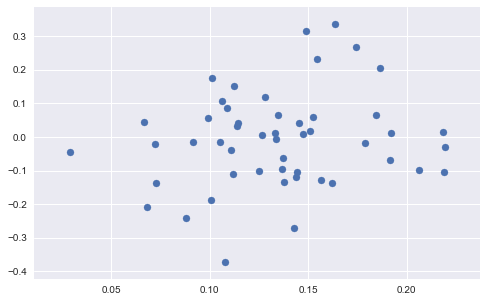

In [224]:
plt.scatter(pca.components_[0], pca.components_[1])

In [225]:
# add PCA values to the dataframe
d['PCA1'] = values_PCA[:, 0]
d['PCA2'] = values_PCA[:, 1]

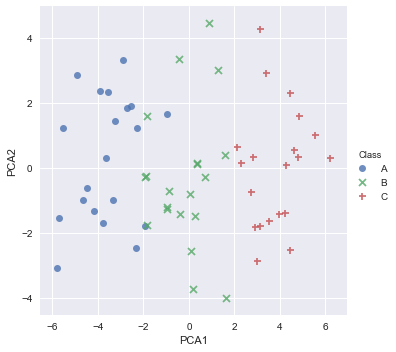

In [226]:
sns.lmplot("PCA1", "PCA2", hue="Class", markers=["o","x","+"], data=d, fit_reg=False)

"c) Perform K-means clustering of the observations with K = 3. How well do the clusters that you obtained in K-means clustering compare to the true class labels? Hint: You can use the value counts() function in the pandas package in Python to compare the true class labels to the class labels obtained by clustering. Be careful how you interpret the results: K-means clustering will arbitrarily number the clusters, so you cannot simply check whether the true class labels and clustering labels are the same."

In [247]:
def cluster_with_kmeans_and_plot(n_clusters, X, name):
    k = KMeans(n_clusters=n_clusters, random_state=0)
    k.fit(X)
    y_kmeans = k.predict(X)
    d[name] = y_kmeans
    sns.lmplot("PCA1", "PCA2", hue="Class", col=name, markers=["o","x","+"], data=d, fit_reg=False, col_wrap=2)

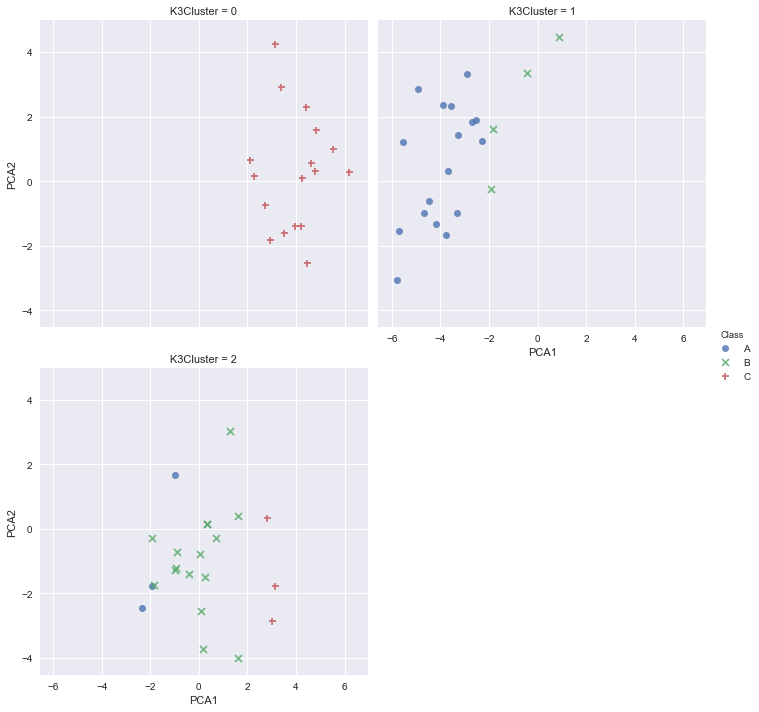

In [248]:
cluster_with_kmeans_and_plot(3, d_train_values, "K3Cluster")

"d) Perform K-means clustering with K = 2. Describe your results."

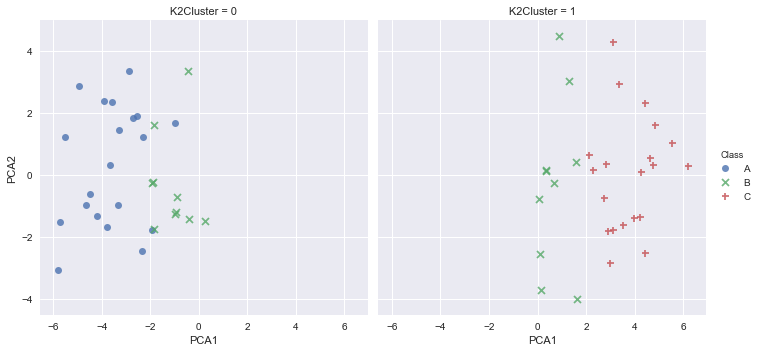

In [249]:
cluster_with_kmeans_and_plot(2, d_train_values, "K2Cluster")

"e) Now perform K-means clustering with K = 4, and describe your results."

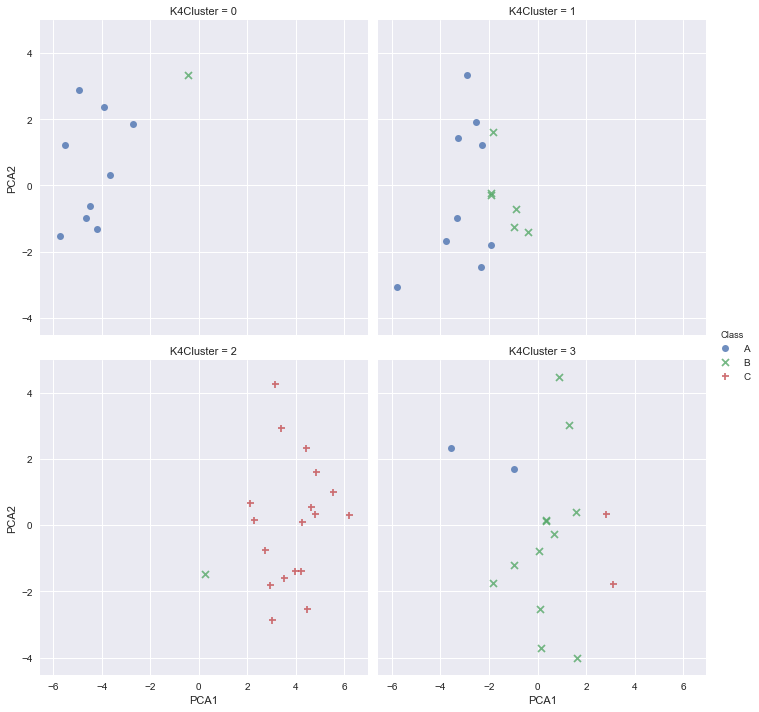

In [250]:
cluster_with_kmeans_and_plot(4, d_train_values, "K4Cluster")

"f) Now perform K-means clustering with K = 3 on the first two principal component score vectors, rather than on the raw data. That is, perform K-means clustering on the 60 × 2 matrix of which the first column is the first principal component score vector, and the second column is the second principal component score vector. Comment on the results."

I'm not 100% sure I understand what this question is asking, but based on conversations with other students I think what it's saying to do is to use the two values provided by PCA for each observation by feeding them to K-means, and then see what clusters those values provide. 

I already have the PCA results from transforming the data - a 60x2 matrix stored in values_PCA - I'll just that data.

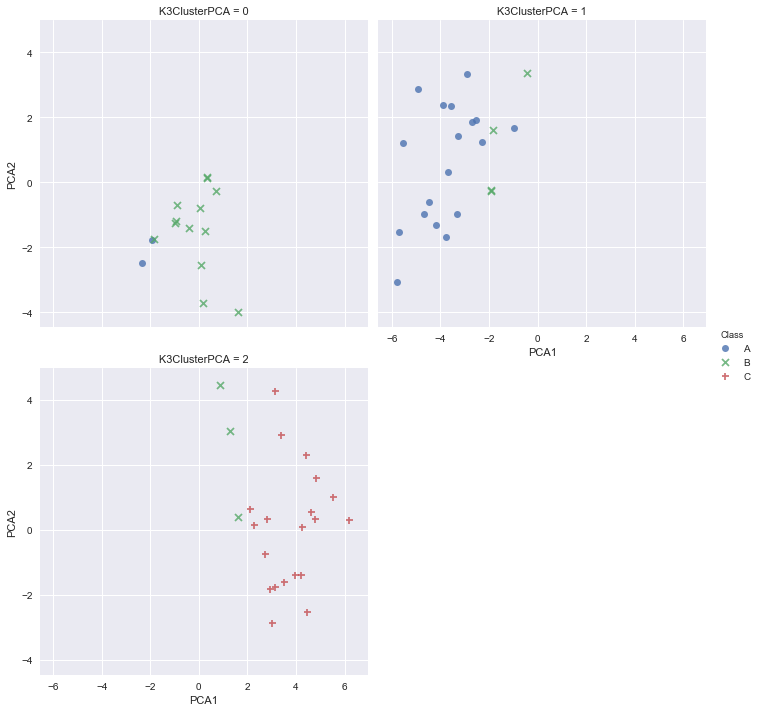

In [334]:
cluster_with_kmeans_and_plot(3, values_PCA, "K3ClusterPCA")

"g) Use the StandardScaler function in sklearn.preprocessing to scale each variable to have standard deviation one. Then perform K-means clustering with K = 3 on the scaled data. How do these results compare to those obtained in (b)? Explain."

My note: while we should expect each to have a stddev of roughly one because that's how we defined the random data that we got, it won't be exactly one just because of randomness. Nonetheless, I can see in the actual data that the existing stddevs _are_ pretty close to one, so I don't expect to see much change. Also, I think I'd choose to use the scale function instead of StandardScaler, myself, but I'll do this with StandardScaler since that's what the homework asks for.

In [36]:
[np.std(d_train_values[:,i]) for i in range(0,50)][:5]

[1.1373500514402355,
 1.0103310278040383,
 0.94320407782324656,
 0.86302641585045348,
 1.1809887992077421]

In [37]:
scaler = preprocessing.StandardScaler(with_mean=False, with_std=True).fit(d_train_values)
scaler

StandardScaler(copy=True, with_mean=False, with_std=True)

In [38]:
d_train_values_std = scaler.transform(d_train_values)
[np.std(d_train_values_std[:,i]) for i in range(0,50)][:5]

[1.0000000000000002,
 0.99999999999999989,
 1.0000000000000002,
 0.99999999999999989,
 0.99999999999999989]

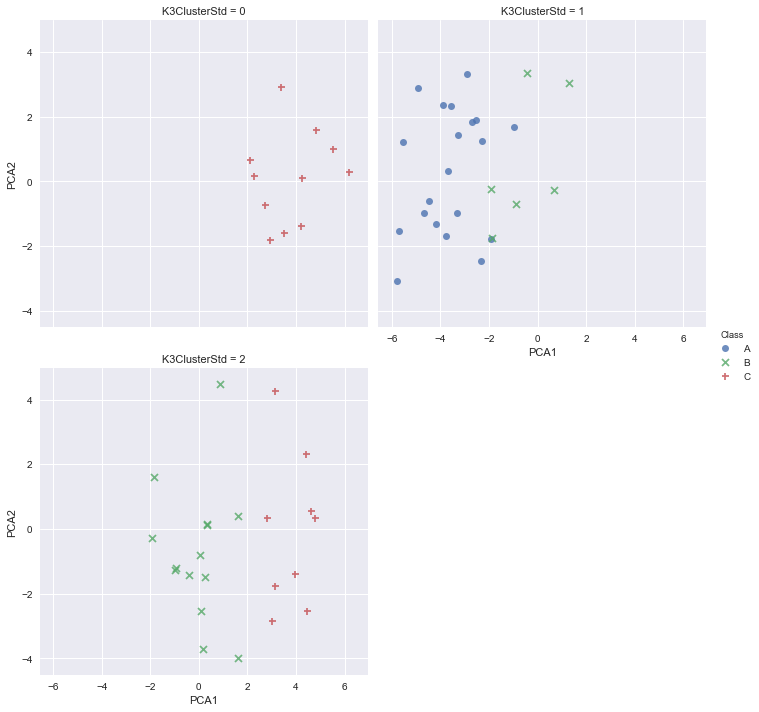

In [241]:
cluster_with_kmeans_and_plot(3, d_train_values_std, "K3ClusterStd")

# Exercise Three

"a) Use the numpy.random.normal() function to generate a predictor X of length n = 100, as well as a noise vector ε of length n = 100."

In [185]:
X = np.random.normal(size=100)
e = np.random.normal(size=100)
(X.shape, e.shape)

((100,), (100,))

"b) Generate a response vector Y of length n = 100 according to the model Y =β0 +β1X+β2X2 +β3X3 +ε,
where β0, β1, β2, and β3 are constants of your choice. Here superscripts denote powers of X."

In [186]:
b0 = 27
b1 = 11
b2 = 5
b3 = 3

In [187]:
y = b0 + (b1*X) + (b2*(X**2)) + (b3*(X**3)) + e
y.shape

(100,)

In [188]:
# and we'll make X a 100,1 array rather than a vector, for better use w/ sklearn functions
X = X[:, np.newaxis]
X.shape

(100, 1)

"c) Now fit a lasso model to the simulated data, using X, X2, . . . , X10 as predictors. Use cross-validation to select the optimal value of λ. Create plots of the cross-validation error as a function of λ. Report the resulting coefficient estimates, and discuss the results obtained."

In [190]:
X_poly10 = PolynomialFeatures(degree=10).fit_transform(X)
X_poly10.shape

(100, 11)

In [54]:
lambda_vals

[1e-05, 0.0001, 0.001, 0.01, 0.1, 1, 10, 100, 1000, 10000]

I think, based on the .score method, that the default evaluator for both Lasso and LassoCV is the R^2 (coefficient of determination) - if I pass in a "r2" value to the scoring param of cross_val_score, I get the same output as I do when I don't specify anything.

In [290]:
r2_by_lambda = pd.Series([np.mean(cross_val_score(Lasso(alpha=lam, 
                                  normalize=True,
                                  max_iter=100000), X_poly10_scaled, y_scaled, cv=10, scoring="r2")) for lam in lambda_vals],
                         index = lambda_vals)
r2_by_lambda

0.00001        0.996684
0.00010        0.996693
0.00100        0.996442
0.01000        0.979021
0.10000       -0.127150
1.00000       -0.165431
10.00000      -0.165431
100.00000     -0.165431
1000.00000    -0.165431
10000.00000   -0.165431
dtype: float64

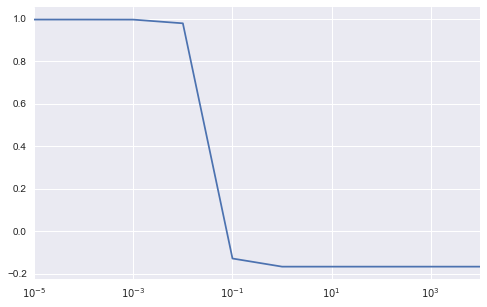

In [291]:
r2_by_lambda.plot(logx=True)

**TODO** Are the numbers above appropriate? Should I expect to see so many of the lambda values giving the same results?

In [292]:
best_lambda = r2_by_lambda.argmax()
best_lambda

0.0001

In [305]:
def fit_lasso_and_output_coefs_and_intercept(lam, X, y):
    results = Lasso(alpha=lam, normalize=True).fit(X, y)
    print(results.intercept_)
    display(list(zip(PolynomialFeatures(10).fit(X).get_feature_names(), results.coef_)))

In [306]:
fit_lasso_and_output_coefs_and_intercept(best_lambda, X_poly10, y)

26.9978123939


[('1', 0.0),
 ('x0', 11.704260432702068),
 ('x1', 5.1350224918753256),
 ('x2', 2.3622838687860832),
 ('x3', 0.014195078310631116),
 ('x4', 0.13043906590404125),
 ('x5', -0.014153409976649425),
 ('x6', 0.0047632249713195985),
 ('x7', -0.0017467228978284605),
 ('x8', -0.0),
 ('x9', -0.000221938531073026)]

While the best lambda is 0.0001, all of the low lambdas are essentially the same. If I try the biggest lambda that gives essentially the same results, then perhaps I can get more coefficients to go to exactly zero instead of, like above, just being very close to zero.

Yep - the results below show that this is the case - all of the coefficients that should be large are large and correct, and there's only one coefficient that is small (x^4).

In [307]:
fit_lasso_and_output_coefs_and_intercept(0.01, X_poly10, y)

27.1107397873


[('1', 0.0),
 ('x0', 11.215709953044421),
 ('x1', 4.9560637123531093),
 ('x2', 2.9294044308323559),
 ('x3', 0.0),
 ('x4', 0.0055742829638698362),
 ('x5', 0.0),
 ('x6', 0.0),
 ('x7', 0.0),
 ('x8', 0.0),
 ('x9', 0.0)]

"d) Now generate a response vector Y according to the model Y = β0 + β7X7 + ε,
and fit a lasso model. Discuss the results obtained."

In [317]:
b7 = 12
new_y = b0 + (b7*(X[:,0]**7)) + e
new_y.shape

(100,)

In [322]:
fit_lasso_and_output_coefs_and_intercept(0.00001, X_poly10, new_y)

27.8026801612


[('1', 0.0),
 ('x0', 20.101555029021871),
 ('x1', -3.2172710357915411),
 ('x2', -52.500074684154377),
 ('x3', -0.23907479657054947),
 ('x4', 33.725117843830901),
 ('x5', 0.27745230811374327),
 ('x6', 4.6194437999631086),
 ('x7', 0.047393935030516296),
 ('x8', 0.45757374224351155),
 ('x9', 0.010018738289794805)]

# Exercise Four

This is the exercise with specific suggested steps to work on as part of the Kaggle competition. Here's a summary of where I am as of TBD (generally they want us to include code or info so they can see where we are and what we're struggling with):

* TBD did I generate feature vectors using AWS? Or in general in any way? 
* TBD did I train an L2-regularized logistic regression classifier using two classes with my own fastgradalgo implementation, and then plot the misclassification error?
* TBD did I find lambda via CV, and then train another logistic regression classifier using fastgradalgo, and plot?

# Exercise Five

"Is there a concept you would love to see covered during the course?"

It seems like the syllabus is changing/has changed a bit, and I'm not sure what the overall plans for coverage are in the rest of the class. So I'll just jot down quick thoughts about things I'd like to know AND things that I at least have some clue about already but that others have said they want to learn about.

* Specific algorithms: a) tree-based algorithms - likely in some detail, since they're used so heavily in a lot of places, b) SVMs, c) at least an intro to neural nets and deep learning. 
* That said, I think I'd benefit most from understanding roughly - but not in detail - how these work, how to use them (dials, levers), and pros and cons compared to other algorithms (these often work well with this kind of data, etc.). Mainly given the relatively short amount of time we have - only a single class, to cover all of 'machine learning' - I don't think I'd prefer to spend tons of time actually implementing particular algorithms. It's very interesting and I learn a lot by doing my own implementation, but probably get less practical benefit from time spent on implementation than I would in a better overall understanding of the pros and cons of more algorithms.
* Feature engineering. I think we're covering this already for one kind of features, with the image work. But coverage of other kinds of features and transformations would be useful/helpful too. As a rough example of the kinds of things I'd like to learn more of: taking lat/lon and transforming into 'close to this kind of business', taking a single date field and generating 'IsHoliday', etc. 
* More coverage of 'small data' uses of ML. At least for me at Microsoft, a lot of my work is with data sets that have an understandable number of features - for example, 20-30 instead of 1000s. More coverage of things to do in the former types of situation would be valuable to me. 

"Is there a concept that has been used multiple times during the course, but you still have no idea what it means?"

I'm still weak on interpreting mathemtical notation (I prefer words) and linear algebra, although am improving - enough to where I could figure out the coordinate descent stuff based just on a few slides w/ formulas. So I'm probably ok there.

"Do you feel that you learn better when the course material is covered using slides, or tablet/whiteboard, or numerical illustrations?"

I learn better when the explanations are in words instead of in mathematical notation, at least to start. As part of 'words' I include examples - i.e., rather than just 'here's the formula' I would learn better by seeing a worked example (or by working an example myself).